In [1]:
# Bibliotecas python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import re
%matplotlib inline

# Função para calcular moda.
from scipy import stats

# Formatação dos gráficos
from matplotlib.ticker import FuncFormatter
from matplotlib.legend import Legend

/home/joaovictor/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Configurando o tema do gráfico
myrcs = {"axes.titleweight": "bold", "lines.markersize": 9.0, "lines.linewidth": 2.0, "legend.title_fontsize": 13.75}
sns.set (style="whitegrid", font_scale=1.35, rc=myrcs)
sns.set_palette (sns.color_palette (["#b2df8a", "#33a02c", "#cab2d6", "#6a3d9a"]))
sns.set_palette (sns.color_palette (["#b2df8a", "#33a02c", "#fdbf6f", "#ff7f00"]))
sns.set_palette (sns.color_palette ("Paired"))




# Linhas exibidas por padrão nos dataframes
pd.options.display.min_rows = 20

In [3]:
#Configurações
# A1 - com switch HW, não podendo aumentar/diminuir número de switches SW (número máximo de SW = 1)
# A5 - com switch HW, podendo aumentar/diminuir número de switches SW (número máximo de SW = 5)
# B - sem switch HW, podendo aumentar/diminuir número de switches SW (número máximo de SW = 5)
# D - com switch HW, não podendo aumentar/diminuir número de switches SW (número de SW fixo em 5)
# E - sem switch HW, não podendo aumentar/diminuir número de switches SW (número de SW fixo em 5)

#Nomes das configurações nos gráficos:
# D = (HW = 1; SW = 5); B = (HW = 0; SW = 1-5); A5 = (HW = 1; SW = 1-5); E = (HW = 0; SW = 5)

# Parâmetros que variam nesta simulação
seeds = [1,2]
cargas = ["50hosts", "100hosts", "150hosts"]
experimentos = ["e","b","d","a5","a1"]

# Tempo total de simulação
t_sim = 2000

# Intervalo de confiança
confianca = 99

# Imprimir titulos nos gráficos
titulos = False

# Salvar graficos
salvarGraficos = False

In [4]:
def read_df_saidaStruct ():
    df_carga = []
    for carga in cargas:
        df_exp = []
        for experimento in experimentos:
            df_sed = []
            for seed in seeds:
                df = pd.read_csv ("saidas/ping/"+carga+"/seed"+str(seed)+"/"+experimento+"-"+carga+"-"+str(seed)+"-saidaStruct.log", sep='\s+', index_col=["Cookie"])
                df_sed.append (df)
            df_exp.append(pd.concat (df_sed, keys=seeds))
        df_carga.append (pd.concat (df_exp, keys=experimentos))
    df_read = pd.concat (df_carga, keys=cargas, names=["Load","Experimento","Seed","Cookie"], copy=False)
    df_read.rename({"50hosts": "Low", "100hosts": "Medium", "150hosts": "High"}, inplace=True)
    return df_read

def read_df_cache ():
    df_carga = []
    for carga in cargas:
        df_exp = []
        for experimento in experimentos:
            df_sed = []
            for seed in seeds:
                df = pd.read_csv ("saidas/ping/"+carga+"/seed"+str(seed)+"/"+experimento+"-"+carga+"-"+str(seed)+"-traffic-qos-l7-app.log", sep='\s+', index_col=["Teid"])
                df_sed.append (df)
            df_exp.append(pd.concat (df_sed, keys=seeds))
        df_carga.append (pd.concat (df_exp, keys=experimentos))
    df_read = pd.concat (df_carga, keys=cargas, names=["Load","Experimento","Seed","Cookie"], copy=False)
    df_read.rename({"50hosts": "Low", "100hosts": "Medium", "150hosts": "High"}, inplace=True)
    return df_read

In [5]:
df_struct = read_df_saidaStruct()
#f = df.loc[(df["InCache"]!=0)]
df_struct

SRCIP      DSTIP  SRCPort  \
Load Experimento Seed Cookie                                              
Low  e           1    0x0040032710753011   10.0.0.4   10.0.0.3    10000   
                      0x0040032711753111   10.0.0.4   10.0.0.3    10001   
                      0x0040032712753211   10.0.0.4   10.0.0.3    10002   
                      0x0040032713753311   10.0.0.4   10.0.0.3    10003   
                      0x0040032714753411   10.0.0.4   10.0.0.3    10004   
                      0x0040032715753511   10.0.0.4   10.0.0.3    10005   
                      0x0040032716753611   10.0.0.4   10.0.0.3    10006   
                      0x0040032717753711   10.0.0.4   10.0.0.3    10007   
                      0x0040032718753811   10.0.0.4   10.0.0.3    10008   
                      0x0040032719753911   10.0.0.4   10.0.0.3    10009   
...                                             ...        ...      ...   
High a1          2    0x12e12d2800762011  10.0.1.46  10.0.1.45    10240   
                      0x12e12d2801762111  10.0.1.46  10.0.1.45    10241   
                      0x12e12d2802762211  10.0.1.46  10.0.1.45    10242   
                      0x12e12d2803762311  10.0.1.46  10.0.1.45    10243   
                      0x12e12d2804762411  10.0.1.46  10.0.1.45    10244   
                      0x12e12d2805762511  10.0.1.46  10.0.1.45    10245   
                      0x12e12d2806762611  10.0.1.46  10.0.1.45    10246   
                      0x12e12d2807762711  10.0.1.46  10.0.1.45    10247   
                      0x12e12d2808762811  10.0.1.46  10.0.1.45    10248   
                      0x12e12d2809762911  10.0.1.46  10.0.1.45    10249   

                                          DSTPort  Protocol  NumSwitches  \
Load Experimento Seed Cookie                                               
Low  e           1    0x0040032710753011    30000        17            0   
                      0x0040032711753111    30001        17            0   
                      0x0040032712753211    30002        17            0   
                      0x0040032713753311    30003        17            0   
                      0x0040032714753411    30004        17            0   
                      0x0040032715753511    30005        17            0   
                      0x0040032716753611    30006        17            0   
                      0x0040032717753711    30007        17            0   
                      0x0040032718753811    30008        17            0   
                      0x0040032719753911    30009        17            0   
...                                           ...       ...          ...   
High a1          2    0x12e12d2800762011    30240        17            0   
                      0x12e12d2801762111    30241        17            0   
                      0x12e12d2802762211    30242        17            0   
                      0x12e12d2803762311    30243        17            0   
                      0x12e12d2804762411    30244        17            0   
                      0x12e12d2805762511    30245        17            0   
                      0x12e12d2806762611    30246        17            0   
                      0x12e12d2807762711    30247        17            0   
                      0x12e12d2808762811    30248        17            0   
                      0x12e12d2809762911    30249        17            0   

                                          Active  InCache  Blocked  Direction  \
Load Experimento Seed Cookie                                                    
Low  e           1    0x0040032710753011       0        0        0          1   
                      0x0040032711753111       0        0        0          1   
                      0x0040032712753211       0        0        0          1   
                      0x0040032713753311       0        0        0          1   
                      0x0040032714753411       0        0        0          1   
    

In [6]:
df_cache = read_df_cache()
df_cache

Time:s   AppName  Ul/Dl  Activ:s  \
Load Experimento Seed Cookie                                                  
Low  e           1    0x0660652711753111    9.439  VoipCall  Ulink    3.098   
                      0x03c03b2710753011   10.954  VoipCall  Ulink    8.675   
                      0x04e04d2712753211   12.113  VoipCall  Ulink    6.704   
                      0x0480472711753111   14.365  VoipCall  Ulink   11.215   
                      0x05e05d2713753311   14.658  VoipCall  Ulink    7.864   
                      0x0040032716753611   15.215  VoipCall  Ulink    6.877   
                      0x0460452711753111   15.843  VoipCall  Ulink   11.399   
                      0x01e01d2718753811   16.055  VoipCall  Ulink    6.447   
                      0x03e03d2714753411   16.068  VoipCall  Ulink    9.961   
                      0x03e03d2713753311   16.084  VoipCall  Ulink   10.471   
...                                           ...       ...    ...      ...   
High a1          2    0x09609527fb761b11  667.427  VoipCall  Ulink   84.081   
                      0x0960952805762511  667.936  VoipCall  Ulink   68.067   
                      0x1021012802762211  667.980  VoipCall  Ulink   91.253   
                      0x0260252808762811  668.576  VoipCall  Ulink   99.682   
                      0x0960952803762311  668.773  VoipCall  Ulink   73.092   
                      0x03803727ff761f11  672.875  VoipCall  Ulink   97.532   
                      0x1021012808762811  681.250  VoipCall  Ulink   96.294   
                      0x0960952807762711  681.433  VoipCall  Ulink   72.291   
                      0x09609527fd761d11  684.308  VoipCall  Ulink   97.397   
                      0x0960952804762411  697.483  VoipCall  Ulink   99.895   

                                          Dly:ms  Jit:ms  TxPkts  RxPkts  \
Load Experimento Seed Cookie                                               
Low  e           1    0x0660652711753111   1.055   0.065       3       2   
                      0x03c03b2710753011   1.013   0.000    1201    1200   
                      0x04e04d2712753211   1.087   0.007      74      73   
                      0x0480472711753111   1.080   0.000     388     387   
                      0x05e05d2713753311   1.139   0.001      93      92   
                      0x0040032716753611   1.152   0.000     406     405   
                      0x0460452711753111   1.117   0.000    1607    1606   
                      0x01e01d2718753811   1.168   0.000    1864    1863   
                      0x03e03d2714753411   1.140   0.000    2119    2118   
                      0x03e03d2713753311   1.134   0.000    1719    1718   
...                                          ...     ...     ...     ...   
High a1          2    0x09609527fb761b11   0.664   0.000   10512   10511   
                      0x0960952805762511   0.590   0.000   33085   33084   
                      0x1021012802762211   0.641   0.000    1504    1503   
                      0x0260252808762811   0.626   0.000    8101    8100   
                      0x0960952803762311   0.634   0.000   23964   23963   
                      0x03803727ff761f11   0.721   0.001     384     383   
                      0x1021012808762811   0.624   0.000    1056    1055   
                      0x0960952807762711   0.565   0.000    2486    2485   
                      0x09609527fd761d11   0.604   0.000    6518    6517   
                      0x0960952804762411   0.573   0.000    2593    2592   

                                          Loss:%   RxBytes  Thp:kbps  
Load Experimento Seed Cookie                                          
Low  e           1    0x0660652711753111  33.333      2940     7.592  
                      0x03c03b2710753011   0.083   1764000  1626.701  
                      0x04e04d2712753211   1.351    107310   128.061  
                      0x0480472711753111   0.258    568890   405.799  
                      0x05e05d2713753311   1.075  

In [7]:
df_concatenado = pd.merge(df_struct, df_cache, how='left', on = ['Cookie', 'Load','Experimento', 'Seed'])
df_concatenado.reset_index(inplace=True)
df_concatenado

,Cookie,Load,Experimento,Seed,SRCIP,DSTIP,SRCPort,DSTPort,Protocol,NumSwitches,...,AppName,Ul/Dl,Activ:s,Dly:ms,Jit:ms,TxPkts,RxPkts,Loss:%,RxBytes,Thp:kbps
0,0x0040032710753011,Low,e,1,10.0.0.4,10.0.0.3,10000,30000,17,0,...,VoipCall,Ulink,19.154,1.147,0.002,264,263,0.379,386610,161.470
1,0x0040032711753111,Low,e,1,10.0.0.4,10.0.0.3,10001,30001,17,0,...,VoipCall,Ulink,98.697,1.337,0.000,3776,3775,0.026,5549250,449.801
2,0x0040032712753211,Low,e,1,10.0.0.4,10.0.0.3,10002,30002,17,0,...,VoipCall,Ulink,55.496,1.289,0.000,2185,2184,0.046,3210480,462.805
3,0x0040032713753311,Low,e,1,10.0.0.4,10.0.0.3,10003,30003,17,0,...,VoipCall,Ulink,50.203,1.281,0.000,4794,4793,0.021,7045710,1122.746
4,0x0040032714753411,Low,e,1,10.0.0.4,10.0.0.3,10004,30004,17,0,...,VoipCall,Ulink,44.253,1.280,0.000,8847,8846,0.011,13003620,2350.767
5,0x0040032715753511,Low,e,1,10.0.0.4,10.0.0.3,10005,30005,17,0,...,VoipCall,Ulink,63.926,1.324,0.000,2775,2774,0.036,4077780,510.308
6,0x0040032716753611,Low,e,1,10.0.0.4,10.0.0.3,10006,30006,17,0,...,VoipCall,Ulink,6.877,1.152,0.000,406,405,0.246,595350,692.569
7,0x0040032717753711,Low,e,1,10.0.0.4,10.0.0.3,10007,30007,17,0,...,VoipCall,Ulink,99.791,1.359,0.000,1079,1078,0.093,1584660,127.038
8,0x0040032718753811,Low,e,1,10.0.0.4,10.0.0.3,10008,30008,17,0,...,VoipCall,Ulink,22.373,1.264,0.000,9438,9437,0.011,13872390,4960.379
9,0x0040032719753911,Low,e,1,10.0.0.4,10.0.0.3,10009,30009,17,0,...,VoipCall,Ulink,8.095,1.207,0.003,450,449,0.222,660030,652.260


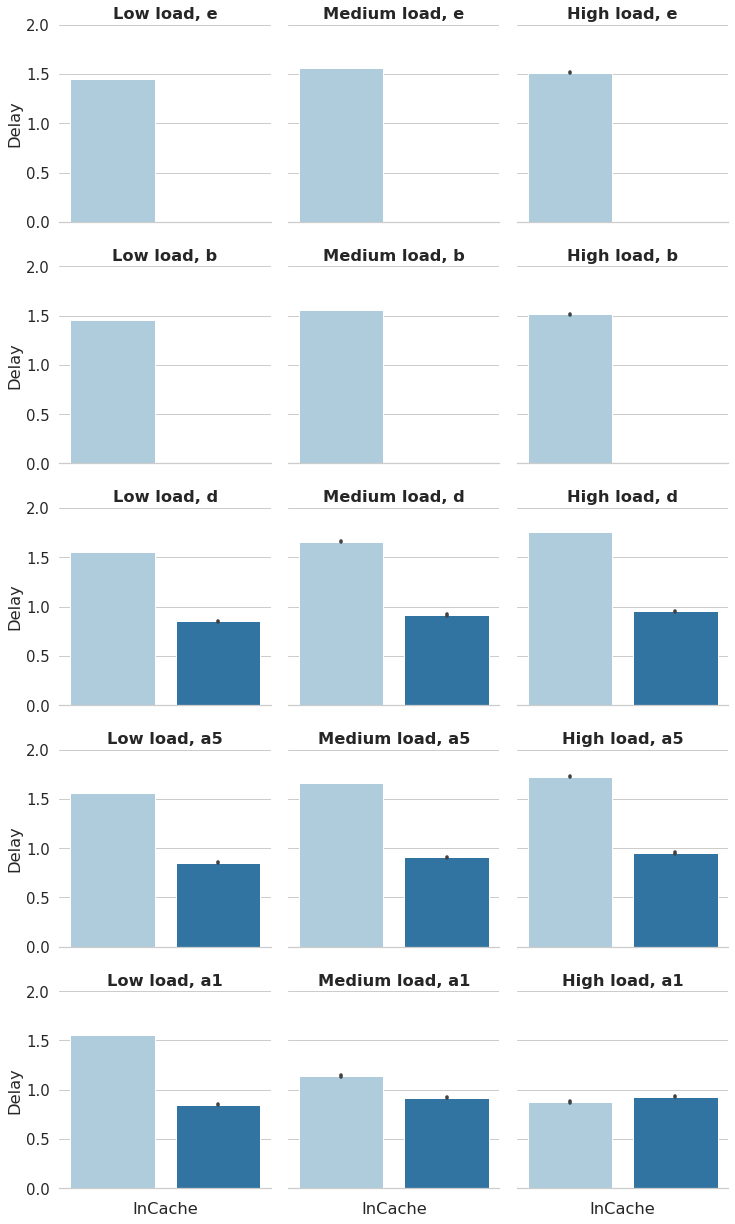

In [19]:
snsplt = sns.catplot( x="InCache", y="Dly:ms", kind="bar",  height=3.5, aspect=1,
                      ci=confianca, data=df_concatenado, row="Experimento" , col="Load",col_order=["Low","Medium","High"])
snsplt.set_titles("{col_name} load, {row_name}")
snsplt.set_axis_labels("InCache", "Delay")
if (titulos):
    snsplt.fig.suptitle('title', y=1.05)
snsplt.set(ylim=(0,2))
snsplt.set_xticklabels(rotation=45, size=12)
#snsplt.fig.set_size_inches(11,4)
snsplt.despine(left=True)
if (salvarGraficos):
    snsplt.savefig("nome.pdf")

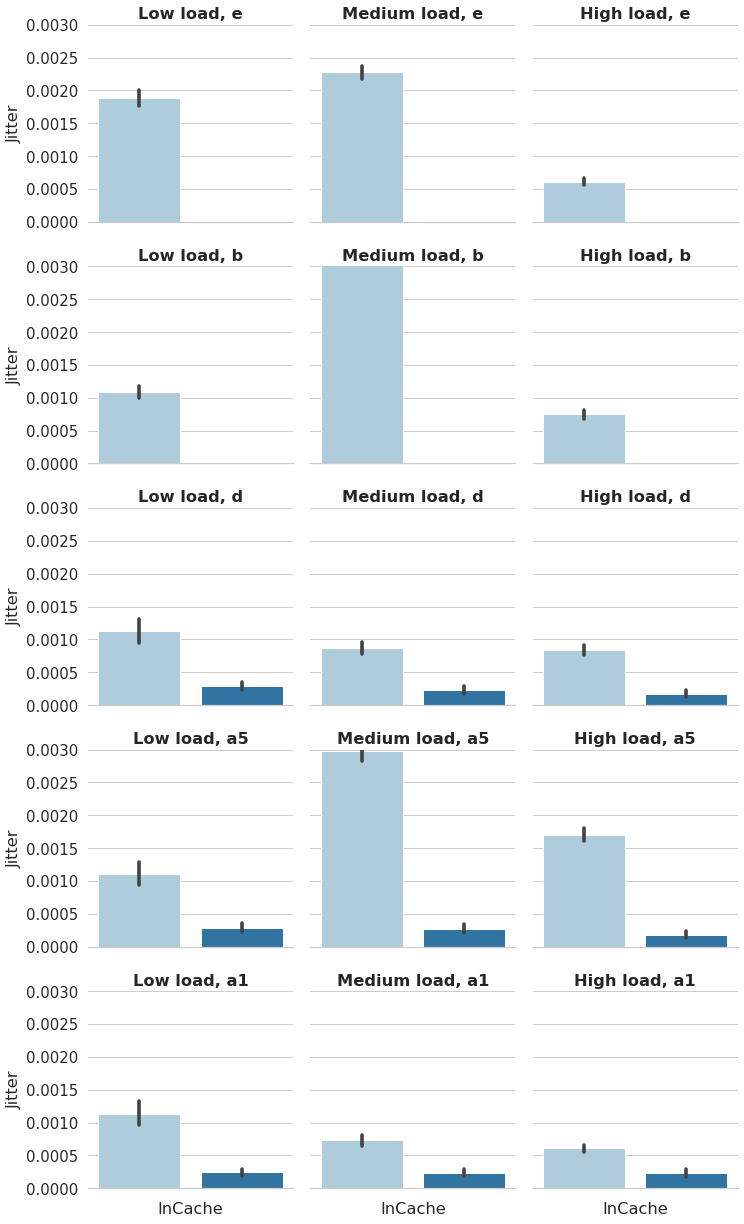

In [20]:
snsplt = sns.catplot( x="InCache", y="Jit:ms", kind="bar",  height=3.5, aspect=1,
                      ci=confianca, data=df_concatenado, row="Experimento" , col="Load",col_order=["Low","Medium","High"])
snsplt.set_titles("{col_name} load, {row_name}")
snsplt.set_axis_labels("InCache", "Jitter")
if (titulos):
    snsplt.fig.suptitle('title', y=1.05)
snsplt.set(ylim=(0,0.003))
snsplt.set_xticklabels(rotation=45, size=12)
#snsplt.fig.set_size_inches(11,4)
snsplt.despine(left=True)
if (salvarGraficos):
    snsplt.savefig("nome.pdf")

In [9]:
#a1-50hosts-1-saidaStruct.log
dfStruct = pd.read_csv("saidas/ping/50hosts/seed1/a1-50hosts-1-saidaStruct.log", sep='\s+', index_col=["Cookie"])
#a1-50hosts-1-traffic-qos-l7-app.log
dfCache = pd.read_csv("saidas/ping/50hosts/seed1/a1-50hosts-1-traffic-qos-l7-app.log", sep='\s+', index_col=["Teid"])

In [10]:
dfStruct.head()

,SRCIP,DSTIP,SRCPort,DSTPort,Protocol,NumSwitches,Active,InCache,Blocked,Direction,TimeCreated,TimeFinished,ExpBytes,Rate
Cookie,,,,,,,,,,,,,,
0x0040032710753011,10.0.0.4,10.0.0.3,10000,30000,17,0,0,1,0,1,1.95388,63.9,18205644,2509127
0x0040032711753111,10.0.0.4,10.0.0.3,10001,30001,17,0,0,1,0,1,4.41295,43.6,707972,159152
0x0040032712753211,10.0.0.4,10.0.0.3,10002,30002,17,0,0,1,0,1,6.96312,53.0,5707740,1060995
0x0040032713753311,10.0.0.4,10.0.0.3,10003,30003,17,0,0,1,0,1,7.13542,117.8,14659720,1140117
0x0040032714753411,10.0.0.4,10.0.0.3,10004,30004,17,0,0,1,0,1,9.21654,108.0,3204824,282414


In [11]:
dfCache.head()

,Time:s,AppName,Ul/Dl,Activ:s,Dly:ms,Jit:ms,TxPkts,RxPkts,Loss:%,RxBytes,Thp:kbps
Teid,,,,,,,,,,,
0x02001f2710753011,10.259,VoipCall,Ulink,7.709,0.991,0.000,333,332,0.300,488040,506.464
0x0080072712753211,10.264,VoipCall,Ulink,7.337,1.002,0.000,387,386,0.258,567420,618.701
0x04003f2710753011,10.838,VoipCall,Ulink,8.146,1.004,0.000,480,479,0.208,704130,691.533
0x04e04d2711753111,12.210,VoipCall,Ulink,7.315,0.983,0.013,160,159,0.625,233730,255.604
0x0180172711753111,12.388,VoipCall,Ulink,6.023,0.948,0.000,560,559,0.179,821730,1091.503
